In [1]:
# Import packages
import math 
import statistics
import numpy as np
import scipy.stats 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# float('nan')
# math.nan 
# np.nan 
# math.nan == math.nan
x = [8.0, 1, 2.5, 4, 28.0]
x_with_nan = [8.0, 1, 2.5, math.nan, 4, 28.0] 
x, x_with_nan

([8.0, 1, 2.5, 4, 28.0], [8.0, 1, 2.5, nan, 4, 28.0])

In [3]:
y, y_with_nan = np.array(x), np.array(x_with_nan)
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)
y, y_with_nan, z, z_with_nan


(array([ 8. ,  1. ,  2.5,  4. , 28. ]),
 array([ 8. ,  1. ,  2.5,  nan,  4. , 28. ]),
 0     8.0
 1     1.0
 2     2.5
 3     4.0
 4    28.0
 dtype: float64,
 0     8.0
 1     1.0
 2     2.5
 3     NaN
 4     4.0
 5    28.0
 dtype: float64)

In [4]:
# mean_
# statistics.mean(x)
# statistics.fmean(x)
# np.mean(y) 
# y.mean()
# statistics.mean(x_with_nan)
# statistics.fmean(x_with_nan)
# np.mean(y_with_nan)
# y_with_nan.mean()
mean_ = sum(x)/len(x)

In [5]:
 #ignores all nan values
np.nanmean(y_with_nan)
# z.mean()
# z_with_nan.mean()


8.7

In [7]:
# Getting the weighted average
x = [8.0, 1, 2.5, 4, 28.0]
w = [0.1, 0.2, 0.3, 0.25, 0.15]
wmean = sum(w[i] * x[i] for i in range(len(x))) / sum(w)
wmean
# wmean = sum(x_ * w_ for (x_, w_) in zip(x, w)) / sum(w)
# wmean 

6.95

In [9]:
# wmean = np.average(z, weights = w)
# wmean
y, z, w = np.array(x), pd.Series(x), np.array(w)
wmean = np.average(y, weights = w)
wmean

6.95

In [10]:
(w * y).sum() / w.sum()

6.95

In [11]:
# If the dataset contains nan values 
w = np.array([0.1, 0.2, 0.3, 0.0, 0.2, 0.1])
(w * y_with_nan).sum() / w.sum()
# np.average(z_with_nan, weights = w)
np.average(y_with_nan, weights = w)


nan

In [12]:
# Harmonic mean 
hmean = len(x) / sum(1 / item for item in x)
hmean
# hmean = statistics.harmonic_mean(x)
# hmean
statistics.harmonic_mean(x_with_nan), statistics.harmonic_mean([1,0,2])
# statistics.harmonic_mean([1,2,-2]) # will create error

(nan, 0)

In [13]:
scipy.stats.hmean(y), scipy.stats.hmean(z)

(2.7613412228796843, 2.7613412228796843)

In [14]:
# Geometric mean 
gmean = 1
for item in x: 
    gmean *= item
gmean **= 1 / len(x)
gmean

4.677885674856041

In [15]:
# gmean = statistics.geometric_mean(x)
gmean = statistics.geometric_mean(x_with_nan)
gmean

nan

In [16]:
scipy.stats.gmean(y), scipy.stats.gmean(z)

(4.67788567485604, 4.67788567485604)

In [17]:
# Median
n = len(x)
if n%2: 
    median_ = sorted(x)[round(0.5*(n-1))]
else:
    x_ord, index = sorted(x), round(0.5 * n)
    median_ = 0.5 * (x_ord[index-1] + x_ord[index])

median_

4

In [19]:
# Without last item
statistics.median(x), statistics.median(x[:-1]) 

(4, 3.25)

In [20]:
statistics.median_low(x[:-1]), statistics.median_high(x[:-1])

(2.5, 4)

In [21]:
statistics.median(x_with_nan), statistics.median_low(x_with_nan), statistics.median_high(x_with_nan)

(6.0, 4, 8.0)

In [22]:
np.median(y), np.median(y[:-1])

(4.0, 3.25)

In [23]:
np.nanmedian(y_with_nan), np.nanmedian(y_with_nan[:-1])

(4.0, 3.25)

In [24]:
z.median(), z_with_nan.median()

(4.0, 4.0)

In [25]:
(4.0, 4.0)

(4.0, 4.0)

In [26]:
# Mode
u = [2, 3, 2, 8, 12]
mode_ = max((u.count(item), item) for item in set(u))[1]
mode_

2

In [27]:
statistics.mode(u), statistics.multimode(u)

(2, [2])

In [28]:
v = [12, 15, 12, 15, 21, 15, 12]
statistics.mode(v), statistics.multimode(v)

(12, [12, 15])

In [29]:
statistics.mode([2, math.nan, 2]),statistics.multimode([2, math.nan, 2]),
statistics.mode([2, math.nan, 0, math.nan, 5]),statistics.multimode([2, math.nan, 0, math.nan, 5]) 

(nan, [nan])

In [30]:
u, v = np.array(u), np.array(v)
mode_ = scipy.stats.mode(u)
mode_ = scipy.stats.mode(v)

In [31]:
mode_.mode, mode_.count

(array([12]), array([3]))

In [32]:
u, v, w = pd.Series(u), pd.Series(v), pd.Series([2, 2, math.nan])
u.mode(), v.mode(), w.mode()

(0    2
 dtype: int64, 0    12
 1    15
 dtype: int64, 0    2.0
 dtype: float64)

In [33]:
# Variance
n = len(x)
mean_ = sum(x) / n
var_ = sum((item - mean_)**2 for item in x) / (n - 1)
var_

123.19999999999999

In [34]:
statistics.variance(x), statistics.variance(x_with_nan)

(123.2, nan)

In [35]:
var_ = np.var(y, ddof = 1)
var_

var_ = y.var(ddof = 1)
var_

123.19999999999999

In [36]:
np.var(y_with_nan, ddof=1), y_with_nan.var(ddof = 1)

(nan, nan)

In [37]:
np.nanvar(y_with_nan, ddof = 1)

123.19999999999999

In [38]:
z.var(ddof = 1), z_with_nan.var(ddof = 1)

(123.19999999999999, 123.19999999999999)

In [39]:
# Standard deviation
var_ ** 0.5, statistics.stdev(x)

(11.099549540409285, 11.099549540409287)

In [40]:
np.std(y, ddof=1), y.std(ddof=1), np.std(y_with_nan, ddof=1),y_with_nan.std(ddof=1), np.nanstd(y_with_nan, ddof=1)    

(11.099549540409285, 11.099549540409285, nan, nan, 11.099549540409285)

In [41]:
z.std(ddof=1), z_with_nan.std(ddof=1)

(11.099549540409285, 11.099549540409285)

In [42]:
# Skewness
x = [8.0, 1, 2.5, 4, 28.0]
n = len(x)
mean_ = sum(x) / n
var_ = sum((item - mean_)**2 for item in x) / (n - 1)
std_ = var_ ** 0.5
skew_ = (sum((item - mean_)**3 for item in x) * n / ((n - 1) * (n - 2) * std_**3))
skew_

1.9470432273905929

In [43]:
y, y_with_nan = np.array(x), np.array(x_with_nan)
scipy.stats.skew(y, bias=False), scipy.stats.skew(y_with_nan, bias=False)

(1.9470432273905927, nan)

In [44]:
z, z_with_nan = pd.Series(x), pd.Series(x_with_nan)
z.skew(), z_with_nan.skew()

(1.9470432273905924, 1.9470432273905924)

In [45]:
# Percentiles
x = [-5.0, -1.1, 0.1, 2.0, 8.0, 12.8, 21.0, 25.8, 41.0]
statistics.quantiles(x, n=2), statistics.quantiles(x, n=4, method='inclusive')

([8.0], [0.1, 8.0, 21.0])

In [46]:
y = np.array(x)
np.percentile(y, 5), np.percentile(y, 95)

(-3.44, 34.919999999999995)

In [47]:
np.percentile(y, [25, 50, 75]), np.median(y)

(array([ 0.1,  8. , 21. ]), 8.0)

In [48]:
y_with_nan = np.insert(y, 2, np.nan)
y_with_nan, np.nanpercentile(y_with_nan, [25, 50, 75])

(array([-5. , -1.1,  nan,  0.1,  2. ,  8. , 12.8, 21. , 25.8, 41. ]),
 array([ 0.1,  8. , 21. ]))

In [49]:
np.quantile(y, 0.05), np.quantile(y, 0.95), np.quantile(y, [0.25, 0.5, 0.75]), np.nanquantile(y_with_nan, [0.25, 0.5, 0.75])

(-3.44,
 34.919999999999995,
 array([ 0.1,  8. , 21. ]),
 array([ 0.1,  8. , 21. ]))

In [50]:
z, z_with_nan = pd.Series(y), pd.Series(y_with_nan)
z.quantile(0.05), z.quantile(0.95), z.quantile([0.25, 0.5, 0.75]),z_with_nan.quantile([0.25, 0.5, 0.75])

(-3.44, 34.919999999999995, 0.25     0.1
 0.50     8.0
 0.75    21.0
 dtype: float64, 0.25     0.1
 0.50     8.0
 0.75    21.0
 dtype: float64)

In [51]:
# Ranges
np.ptp(y),np.ptp(z),np.ptp(y_with_nan),np.ptp(z_with_nan)

(46.0, 46.0, nan, nan)

In [52]:
np.amax(y) - np.amin(y),np.nanmax(y_with_nan) - np.nanmin(y_with_nan)

(46.0, 46.0)

In [53]:
y.max() - y.min(), z.max() - z.min(),z_with_nan.max() - z_with_nan.min()

(46.0, 46.0, 46.0)

In [54]:
quartiles = np.quantile(y, [0.25, 0.75])
quartiles[1] - quartiles[0]

20.9

In [55]:
quartiles = z.quantile([0.25, 0.75])
quartiles[0.75] - quartiles[0.25]

20.9

In [56]:
# Summary of Descriptive Statistics
result = scipy.stats.describe(y, ddof=1, bias=False)
result

DescribeResult(nobs=9, minmax=(-5.0, 41.0), mean=11.622222222222222, variance=228.75194444444446, skewness=0.9249043136685094, kurtosis=0.14770623629658886)

In [57]:
result.nobs, result.minmax[0], result.minmax[1], result.mean, result.variance, result.skewness, result.kurtosis

(9,
 -5.0,
 41.0,
 11.622222222222222,
 228.75194444444446,
 0.9249043136685094,
 0.14770623629658886)

In [58]:
result = z.describe()
result

count     9.000000
mean     11.622222
std      15.124548
min      -5.000000
25%       0.100000
50%       8.000000
75%      21.000000
max      41.000000
dtype: float64

In [59]:
result['mean'],result['std'],result['min'],result['max'],result['25%'], result['50%'], result['75%']

(11.622222222222222, 15.12454774346805, -5.0, 41.0, 0.1, 8.0, 21.0)

In [60]:
# Measures of Correlation Between Pairs of Data
x = list(range(-10, 11))
y = [0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 12, 14]
x_, y_ = np.array(x), np.array(y)
x__, y__ = pd.Series(x_), pd.Series(y_)

In [61]:
# Covariance
n = len(x)
mean_x, mean_y = sum(x) / n, sum(y) / n
cov_xy = (sum((x[k] - mean_x) * (y[k] - mean_y) for k in range(n)) / (n - 1))
cov_xy

19.95

In [62]:
cov_matrix = np.cov(x_, y_)
cov_matrix

array([[38.5       , 19.95      ],
       [19.95      , 13.91428571]])

In [63]:
x_.var(ddof=1), y_.var(ddof=1)

(38.5, 13.914285714285711)

In [64]:
cov_xy = cov_matrix[0, 1]
cov_xy
cov_xy = cov_matrix[1, 0]
cov_xy

19.95

In [65]:
cov_xy = x__.cov(y__)
cov_xy
cov_xy = y__.cov(x__)
cov_xy

19.95

In [66]:
# Correlation Coefficient 
var_x = sum((item - mean_x)**2 for item in x) / (n - 1)
var_y = sum((item - mean_y)**2 for item in y) / (n - 1)
std_x, std_y = var_x ** 0.5, var_y ** 0.5
r = cov_xy / (std_x * std_y)
r

0.861950005631606

In [67]:
r, p = scipy.stats.pearsonr(x_, y_)
r, p

(0.8619500056316061, 5.122760847201135e-07)

In [68]:
corr_matrix = np.corrcoef(x_, y_)
corr_matrix

array([[1.        , 0.86195001],
       [0.86195001, 1.        ]])

In [69]:
r = corr_matrix[0, 1]
r
r = corr_matrix[1, 0]
r

0.861950005631606

In [70]:
scipy.stats.linregress(x_, y_)

LinregressResult(slope=0.5181818181818181, intercept=5.714285714285714, rvalue=0.861950005631606, pvalue=5.122760847201164e-07, stderr=0.06992387660074979, intercept_stderr=0.4234100995002589)

In [71]:
result = scipy.stats.linregress(x_, y_)
r = result.rvalue
r

0.861950005631606

In [72]:
r = x__.corr(y__)
r
r = y__.corr(x__)
r

0.861950005631606

In [73]:
# Working with 2D Data
a = np.array([[1, 1, 1],
              [2, 3, 1],
              [4, 9, 2],
              [8, 27, 4],
              [16, 1, 1]])
a

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [74]:
np.mean(a), a.mean(), np.median(a), a.var(ddof=1)

(5.4, 5.4, 2.0, 53.40000000000001)

In [75]:
np.mean(a, axis=0), a.mean(axis=0)

(array([6.2, 8.2, 1.8]), array([6.2, 8.2, 1.8]))

In [76]:
np.mean(a, axis=1), a.mean(axis=1)

(array([ 1.,  2.,  5., 13.,  6.]), array([ 1.,  2.,  5., 13.,  6.]))

In [77]:
np.median(a, axis=0), np.median(a, axis=1), a.var(axis=0, ddof=1), a.var(axis=1, ddof=1)

(array([4., 3., 1.]),
 array([1., 2., 4., 8., 1.]),
 array([ 37.2, 121.2,   1.7]),
 array([  0.,   1.,  13., 151.,  75.]))

In [78]:
scipy.stats.gmean(a), scipy.stats.gmean(a, axis=0)

(array([4.        , 3.73719282, 1.51571657]),
 array([4.        , 3.73719282, 1.51571657]))

In [79]:
scipy.stats.gmean(a, axis=1), scipy.stats.gmean(a, axis=None)

(array([1.        , 1.81712059, 4.16016765, 9.52440631, 2.5198421 ]),
 2.829705017016332)

In [80]:
scipy.stats.describe(a, axis=None, ddof=1, bias=False), 
scipy.stats.describe(a, ddof=1, bias=False), 
scipy.stats.describe(a, axis=1, ddof=1, bias=False)

DescribeResult(nobs=3, minmax=(array([1, 1, 2, 4, 1]), array([ 1,  3,  9, 27, 16])), mean=array([ 1.,  2.,  5., 13.,  6.]), variance=array([  0.,   1.,  13., 151.,  75.]), skewness=array([0.        , 0.        , 1.15206964, 1.52787436, 1.73205081]), kurtosis=array([-3. , -1.5, -1.5, -1.5, -1.5]))

In [81]:
result = scipy.stats.describe(a, axis=1, ddof=1, bias=False)
result.mean

array([ 1.,  2.,  5., 13.,  6.])

In [82]:
# Dataframes
row_names = ['first', 'second', 'third', 'fourth', 'fifth']
col_names = ['A', 'B', 'C']
df = pd.DataFrame(a, index=row_names, columns=col_names)
df

,A,B,C
first,1,1,1
second,2,3,1
third,4,9,2
fourth,8,27,4
fifth,16,1,1


In [83]:
df.mean(), df.var(), df.mean(axis=1),df.var(axis=1)

(A    6.2
 B    8.2
 C    1.8
 dtype: float64, A     37.2
 B    121.2
 C      1.7
 dtype: float64, first      1.0
 second     2.0
 third      5.0
 fourth    13.0
 fifth      6.0
 dtype: float64, first       0.0
 second      1.0
 third      13.0
 fourth    151.0
 fifth      75.0
 dtype: float64)

In [84]:
df['A'],df['A'].mean(),df['A'].var(),df.values,df.to_numpy()

(first      1
 second     2
 third      4
 fourth     8
 fifth     16
 Name: A, dtype: int64, 6.2, 37.20000000000001, array([[ 1,  1,  1],
        [ 2,  3,  1],
        [ 4,  9,  2],
        [ 8, 27,  4],
        [16,  1,  1]]), array([[ 1,  1,  1],
        [ 2,  3,  1],
        [ 4,  9,  2],
        [ 8, 27,  4],
        [16,  1,  1]]))

In [85]:
df.describe()

,A,B,C
count,5.00000,5.000000,5.00000
mean,6.20000,8.200000,1.80000
std,6.09918,11.009087,1.30384
min,1.00000,1.000000,1.00000
25%,2.00000,1.000000,1.00000
50%,4.00000,3.000000,1.00000
75%,8.00000,9.000000,2.00000
max,16.00000,27.000000,4.00000


In [86]:
df.describe().at['mean', 'A'],df.describe().at['50%', 'B']

(6.2, 3.0)

In [87]:
# Visualizing Data
plt.style.use('ggplot')

In [88]:
# Boxplots
np.random.seed(seed=0)
x = np.random.randn(1000)
y = np.random.randn(100)
z = np.random.randn(10)

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


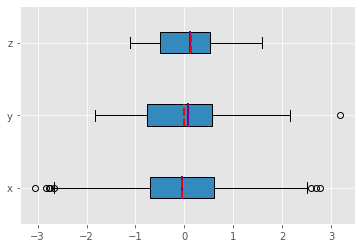

In [89]:
fig, ax = plt.subplots()
ax.boxplot((x, y, z), vert=False, showmeans=True, meanline=True,
           labels=('x', 'y', 'z'), patch_artist=True,
           medianprops={'linewidth': 2, 'color': 'purple'},
           meanprops={'linewidth': 2, 'color': 'red'})
plt.show()

In [90]:
# Histograms
hist, bin_edges = np.histogram(x, bins=10)
hist, bin_edges

(array([  9,  20,  70, 146, 217, 239, 160,  86,  38,  15]),
 array([-3.04614305, -2.46559324, -1.88504342, -1.3044936 , -0.72394379,
        -0.14339397,  0.43715585,  1.01770566,  1.59825548,  2.1788053 ,
         2.75935511]))

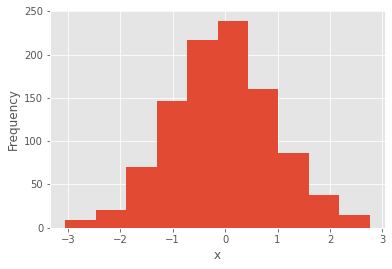

In [91]:
fig, ax = plt.subplots()
ax.hist(x, bin_edges, cumulative=False)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
plt.show()

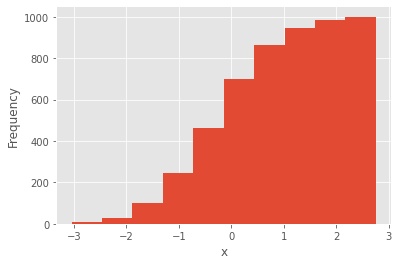

In [92]:
fig, ax = plt.subplots()
ax.hist(x, bin_edges, cumulative=True)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
plt.show()

In [93]:
# Pie Charts
x, y, z = 128, 256, 1024

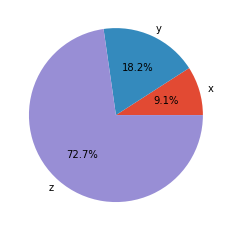

In [94]:
fig, ax = plt.subplots()
ax.pie((x, y, z), labels=('x', 'y', 'z'), autopct='%1.1f%%')
plt.show()

In [95]:
# Bar Charts
x = np.arange(21)
y = np.random.randint(21, size=21)
err = np.random.randn(21)

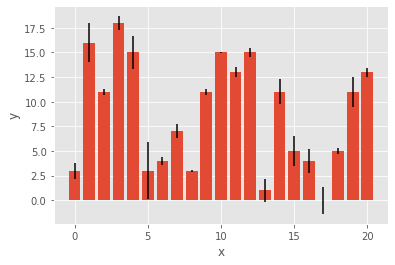

In [96]:
fig, ax = plt.subplots()
ax.bar(x, y, yerr=err)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [97]:
# X-Y Plots
x = np.arange(21)
y = 5 + 2 * x + 2 * np.random.randn(21)
slope, intercept, r, *__ = scipy.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

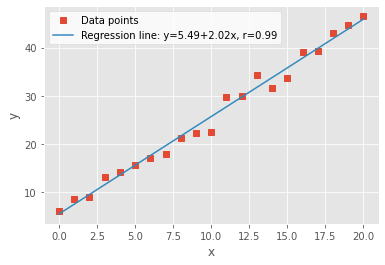

In [98]:
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()

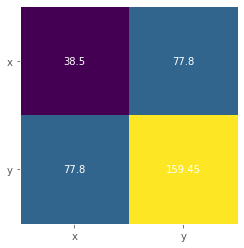

In [99]:
matrix = np.cov(x, y).round(decimals=2)
fig, ax = plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, matrix[i, j], ha='center', va='center', color='w')
plt.show()

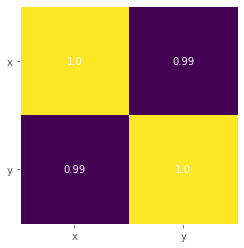

In [100]:
matrix = np.corrcoef(x, y).round(decimals=2)
fig, ax = plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, matrix[i, j], ha='center', va='center', color='w')
plt.show()